In [3]:
# Ejemplo de modo largo
# Esto lo definimos  mano


In [4]:
import numpy as np

In [5]:
# Primero creamos nuestra clase percepton
# Esto es POO
class Perceptron():
    def __init__(self, inputs, weights):
        # TODO
        self.inputs = np.array(inputs)
        self.weights = np.array(weights)
    def decide(self, treshold):
        total = 0
        for input_, weight_ in zip(sel.inpust, self.weights):
            total += input_ * weight_

        if total >= treshold:
            valor = True
        else:
            valor = False
        return None

In [6]:
# Revisar mejor que es el "@" regresa el producto interno
# 1.- Verifica si el producto interno es mayor o igual al umbral que yo le especifique

In [7]:
class Perceptron():
    def __init__(self, inputs, weights):
        # TODO
        self.inputs = np.array(inputs)
        self.weights = np.array(weights)
    def decide(self, treshold):
        return (self.inputs @ self.weights) >= treshold  # 1

In [8]:
# Ahora necesitamos darle sus entreadas y pesos asociados

In [9]:
inputs, weights = [], []

preguntas = [
    "¿Cuál es la velocidad? ",  # Entero
    "¿Ritmo carfiaco? ",  # 1, 2, 3
    "¿Respiración? " # 1, 2, 3
]

for pregunta in preguntas:
    i = int(input(pregunta))
    w = int(input("Y su peso asociado es... "))
    inputs.append(i)
    weights.append(w)
    print()
    

treshold = int(input("Y nuestro umbral/límite será: "))

  

In [10]:
p = Perceptron(inputs, weights)
p.decide(treshold)

True

In [11]:
# Modificamos para añadir la función de activación

In [12]:
class SigmoidNeuron():
    def __init__(self, inputs, weights):
        self.inputs = np.array(inputs)
        self.weights = np.array(weights)
    def decide(self, bias):
        z = (self.weights @ self.inputs) + bias
        return 1. / (1. + np.exp(-z))

In [13]:
# Debería devolverme un valor entre 0 y 1

In [14]:
bias = int(input("El nuevo bias será: "))
s = SigmoidNeuron(inputs, weights)
s.decide(bias)

0.9933071490757153

- Ejercicio práctico: Red neuronal de pesos aleatorios

In [15]:
# Función unforme hace nos devuelve valor random entre 0 y 1

In [16]:
from numpy.random import uniform as u

In [17]:
class NeuralNet:
    """Objeto NeuralNet para crear redes neuronales artificiales.


    Por simplicidad, supondremos que la capa de entrada siempre será de
    dos neuronas y la capa de salida siempre de una, con el fin de poder
    visualizar el funcionamiento interno de la red como un mapeo
    $\mathbb{R}^2 \to \mathbb{R}$."""

    def __init__(self, n_layers=1, n_neurons=4):
        """Constructor de la clase.
        
        Inicializa pesos aleatorios en la red neuronal.
        
        Parámetros
        ----------
        n_capas : int
            Número de capas ocultas en la red. Por default, el valor
            es 1.
        n_neuronas : int
            Número de neuronas por capa en la red. Por default, el
            valor es 4.
        """

        # Definimos pesos y biases en la capa de entrada
        self.w_in = u(low=-1, high=1, size=(2, n_neurons)) # TODO u [-1, 1]/[low, high] (2, n_neurons)/size
        self.b_in = u(low=-1, high=1, size=n_neurons)  # TODO u [-1, 1] n_neurons

        # Definimos pesos y biases en las capas ocultas
        self.w_hidden = u(low=-3, high=3, size=(n_layers, n_neurons, n_neurons)) # TODO u [-3, 3] (n_layers, n_neurons, n_neurons)
        self.b_hidden = u(low=-1, high=1, size=(n_layers, n_neurons))# TODO u [-1, 1] (n_layers, n_neurons)

        # Definimos pesos y biases en las capa de salida
        self.w_out = u(low=-1, high=1, size=(n_neurons, 1)) # TODO u [-1, 1] (n_neurons, 1)
        self.b_out = u(low=-1, high=1, size=1) # TODO u [-1, 1] 1

    @staticmethod
    def activate_layer(y_in, w, b):
        """Calcula el producto interno y aplica función de activación
        por capa.
        
        Parámetros
        ----------
        y_in : ndarray
            El vector con datos de entrada.
        w : ndarray
            El vector de pesos.
        b : ndarray
            El vector de biases.
        
        Retorna
        -------
        s : ndarray
            Un vector de activación reultante.
        """

        z = np.dot(y_in, w) + b # TODO y_in · w + b
        s = 1. / (1. + np.exp(-z)) # TODO apply sigmoid
        
        return s

    def feedforward(self, y_in):
        """Calcula el producto interno y aplica función de activación
        por capa.
        
        Parámetros
        ----------
        y_in : ndarray
            El vector con datos de entrada.
        w : ndarray
            El vector de pesos.
        b : ndarray
            El vector de biases.
        
        Retorna
        -------
        s : ndarray
            Un vector de activación reultante."""

        y = self.activate_layer(y_in, self.w_in, self.b_in) # TODO Apply self.activate -> (y_in, self.w_in, self.b_in)
        for i in range(self.w_hidden.shape[0]):  # Número de capas ocultas
            y = self.activate_layer(y, self.w_hidden[i], self.b_hidden[i]) # TODO Apply self.activate -> (y, self.w_hidden[i], self.b_hidden[i])
        output = self.activate_layer(y, self.w_out, self.b_out) # TODO Apply self.activate -> (y, self.w_out, self.b_out)
        
        return output
    
    def visualize(self, grid_size=50, colormap='viridis', c_reverse=False):
        """Función para visualizar el mapeo de la red neuronal en un 
        plano 2D.
        
        Parámetros
        ----------
        grid_size : int
            El tamaño a utlizar para crear rejilla. La rejilla se crea de 
            tamaño (grid_size, grid_size). El valor default es 50.
        colormap : str
            El mapa de color a utilizar. El valor default es 'viridis'.
        c_reverse : bool
            Flag para especificar si se invierte el mapa de color. El valor
            default es False.
        """

        import matplotlib.pyplot as plt
        import matplotlib as mpl
        mpl.rcParams['figure.dpi'] = 300

        # Creamos una rejilla
        x = np.linspace(-0.5, 0.5, grid_size)
        y = np.linspace(-0.5, 0.5, grid_size)
        xx, yy = np.meshgrid(x, y)

        # Para todas las coordenadas (x, y) en la rejilla,
        # hacemos una única lista con los pares de puntos
        x_flat = xx.flatten()
        y_flat = yy.flatten()
        y_in = zip(x_flat, y_flat)
        y_in = np.array(list(y_in))

        # Hacemos feedforward con la red
        y_out = self.feedforward(y_in) # TODO Apply self.feedforward on y_in
        
        # Redimensionamos a la rejilla
        y_out_2d = np.reshape(y_out, (grid_size, grid_size))

        if c_reverse:
            cmap = plt.cm.get_cmap(colormap)
            cmap = cmap.reversed()
        else:
            cmap = colormap
        
        # Graficamos los resultados de la red
        plt.figure(figsize=(10, 10))
        plt.axes([0, 0, 1, 1])
        plt.imshow(
            y_out_2d,
            extent=[-0.5, 0.5, -0.5, 0.5],
            interpolation='nearest',
            cmap=cmap
        )
        plt.axis(False)
        plt.show()

In [18]:
# DEfinimos los valores de entrada
y_in = np.array([0.8, 0.2])

In [19]:
nn = NeuralNet()

In [20]:
nn.w_hidden

array([[[-2.52601445,  1.87841888, -1.7810208 ,  0.24572937],
        [-0.88832096, -2.53860738,  1.78622309, -2.61376537],
        [-1.02651999, -0.63147131, -2.32662578,  1.13255368],
        [-1.45135019,  1.54882334,  2.08412896,  1.07995188]]])

In [21]:
nn.feedforward(y_in)

array([0.55733865])

- Profundizando en el tema

In [22]:
deep_nn = NeuralNet(n_layers=20, n_neurons=100)

In [23]:
deep_nn.feedforward(y_in)

array([0.00352151])

- Visualización

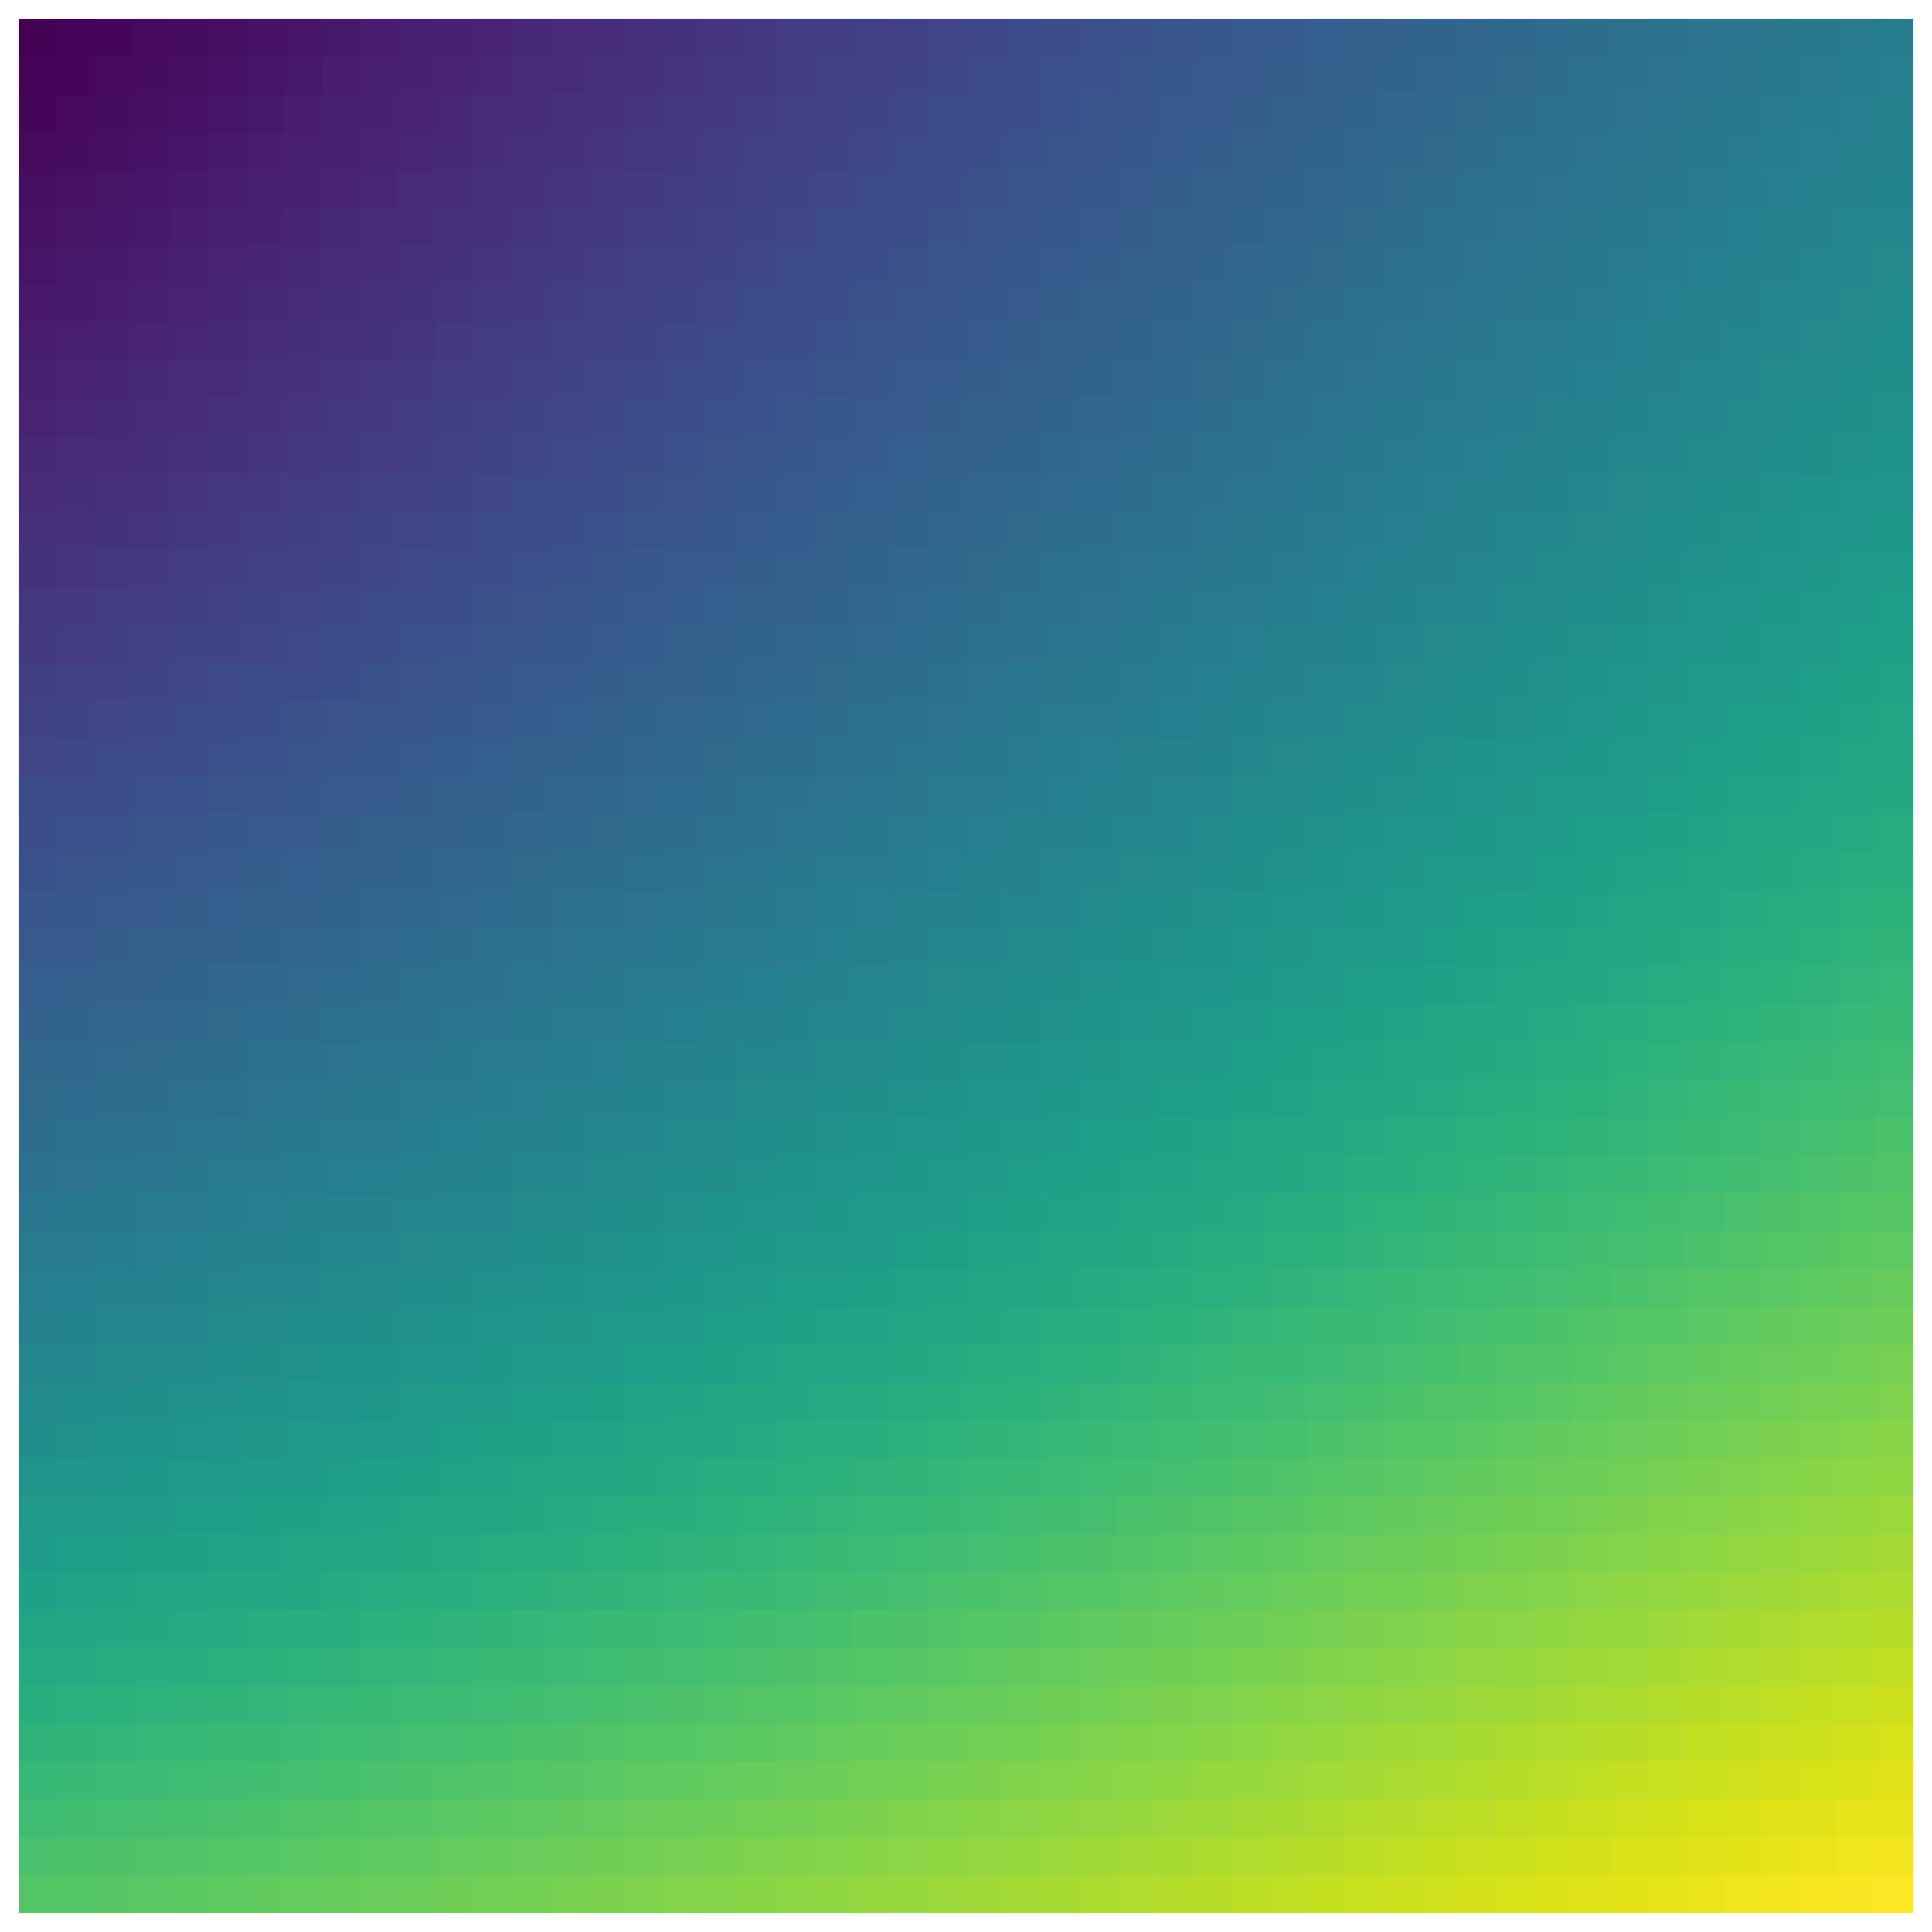

In [24]:
nn.visualize()

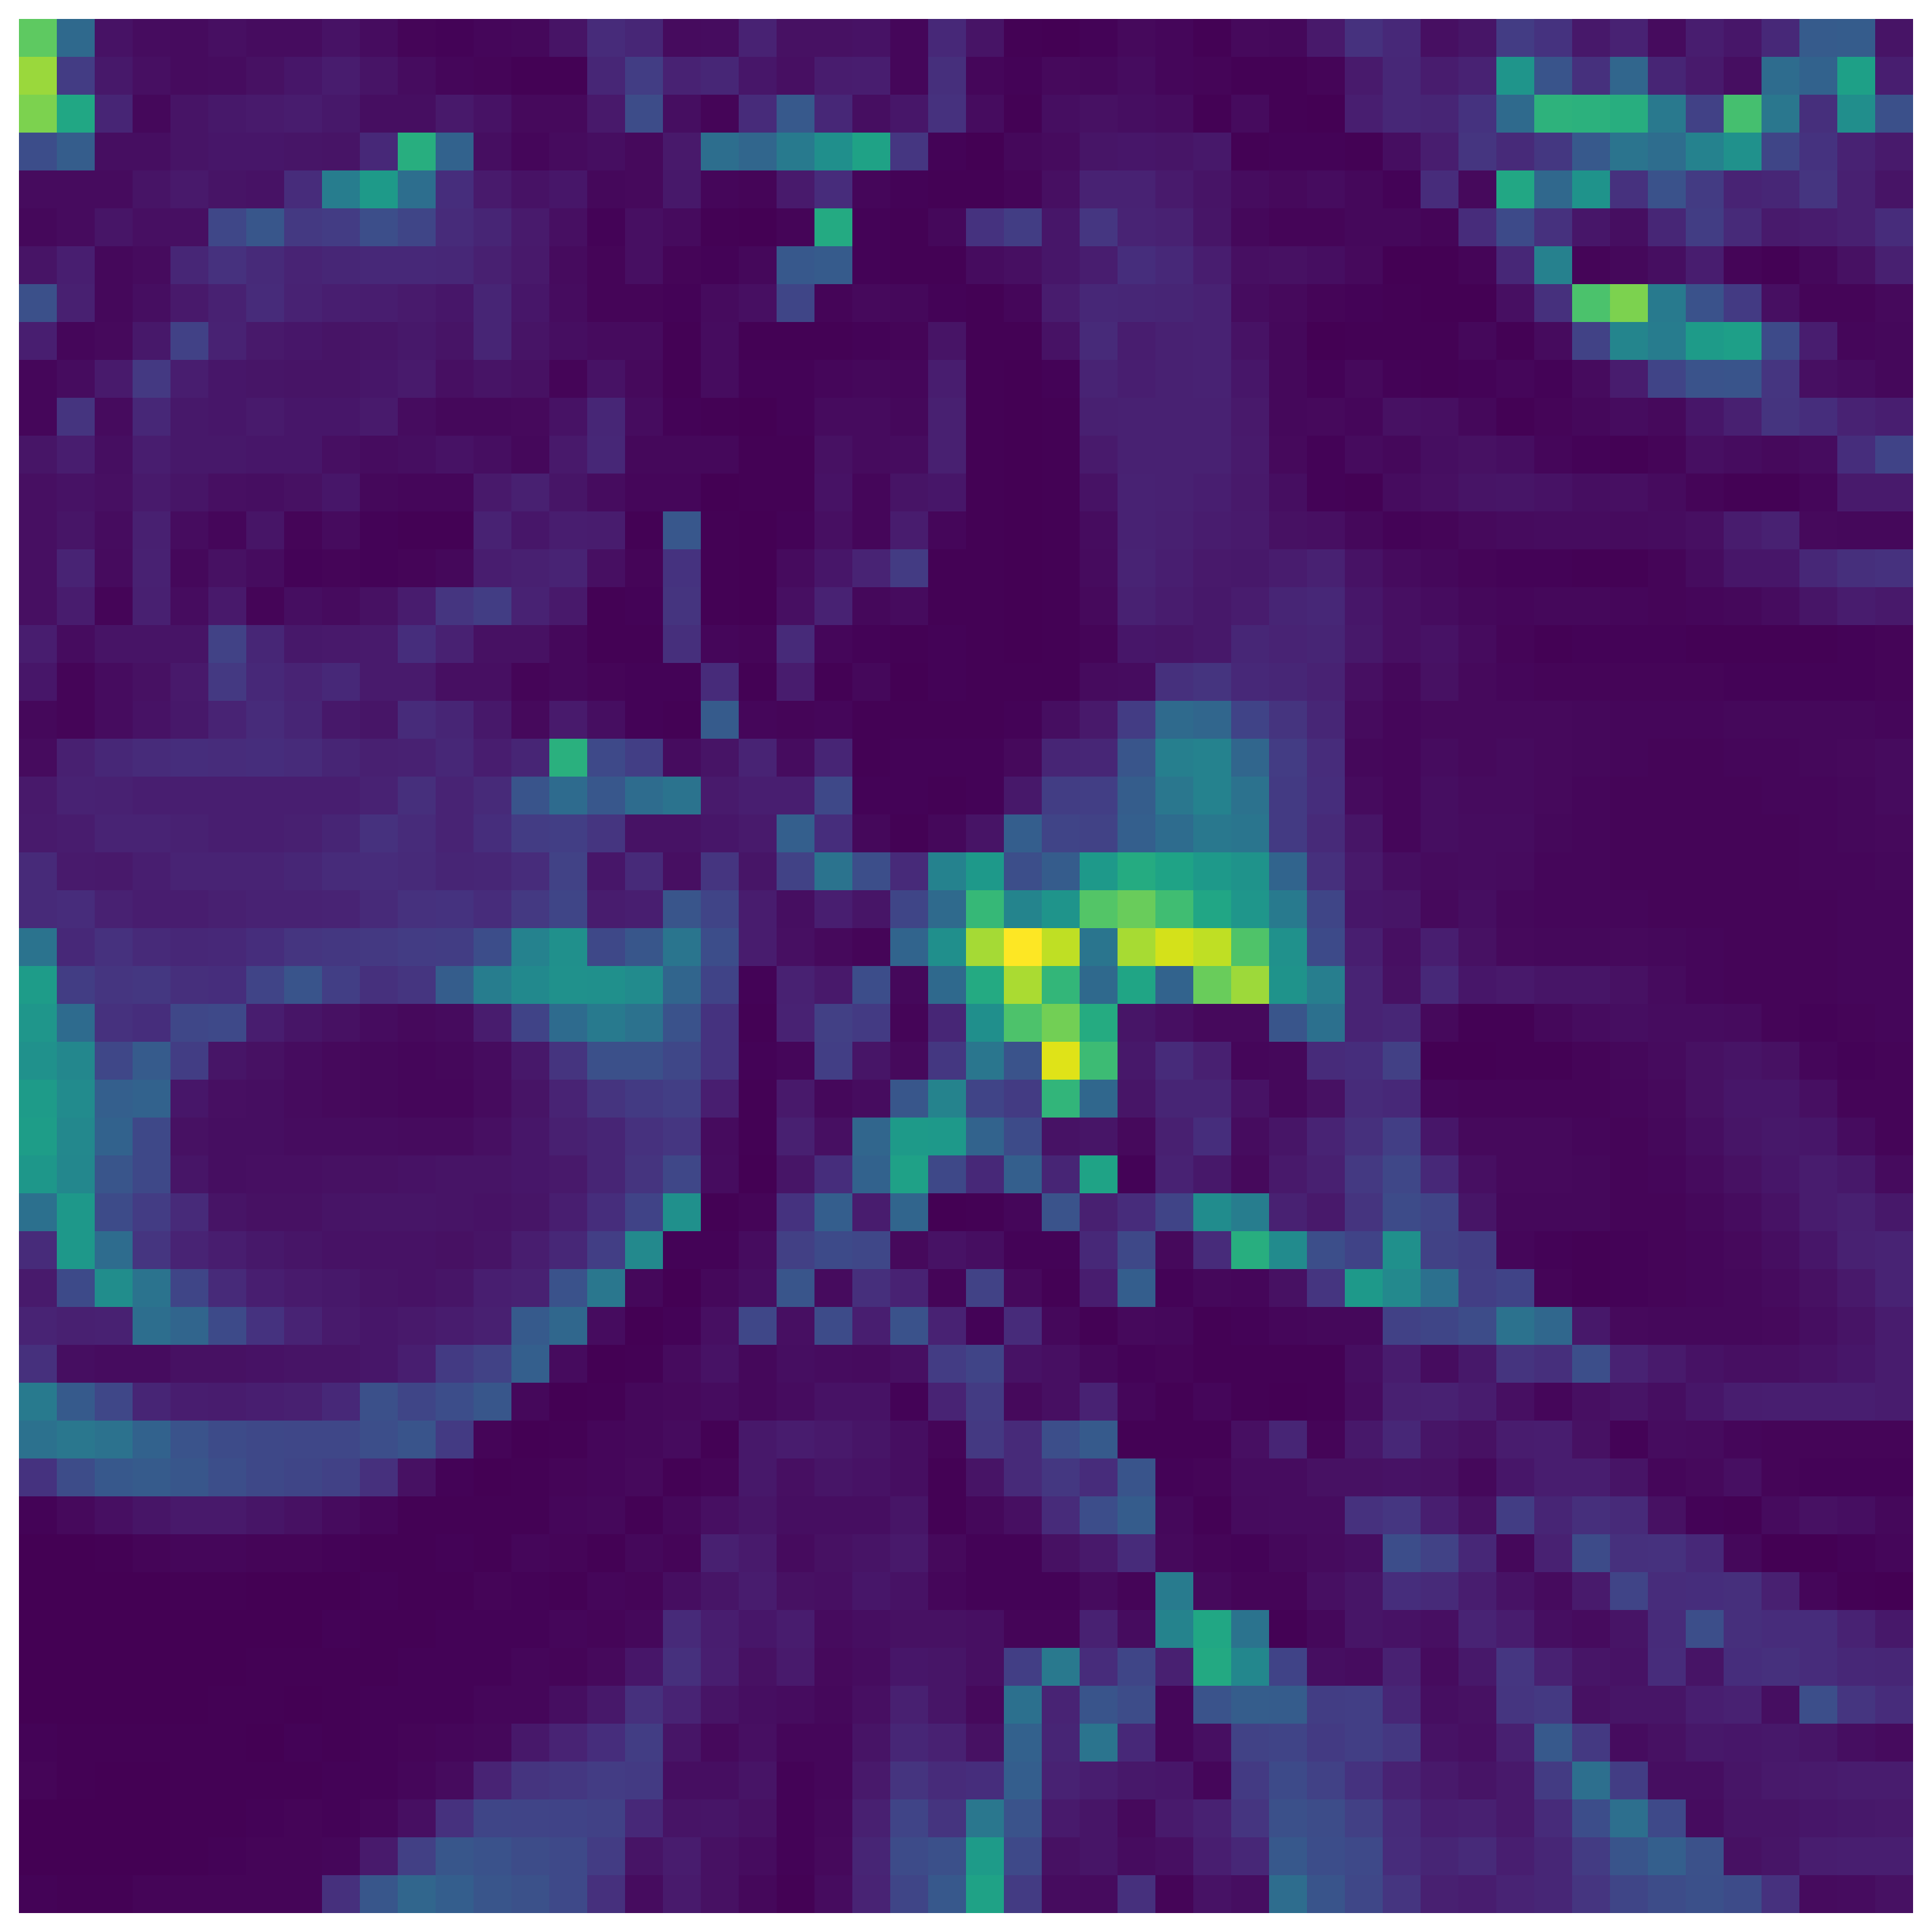

In [25]:
deep_nn.visualize()

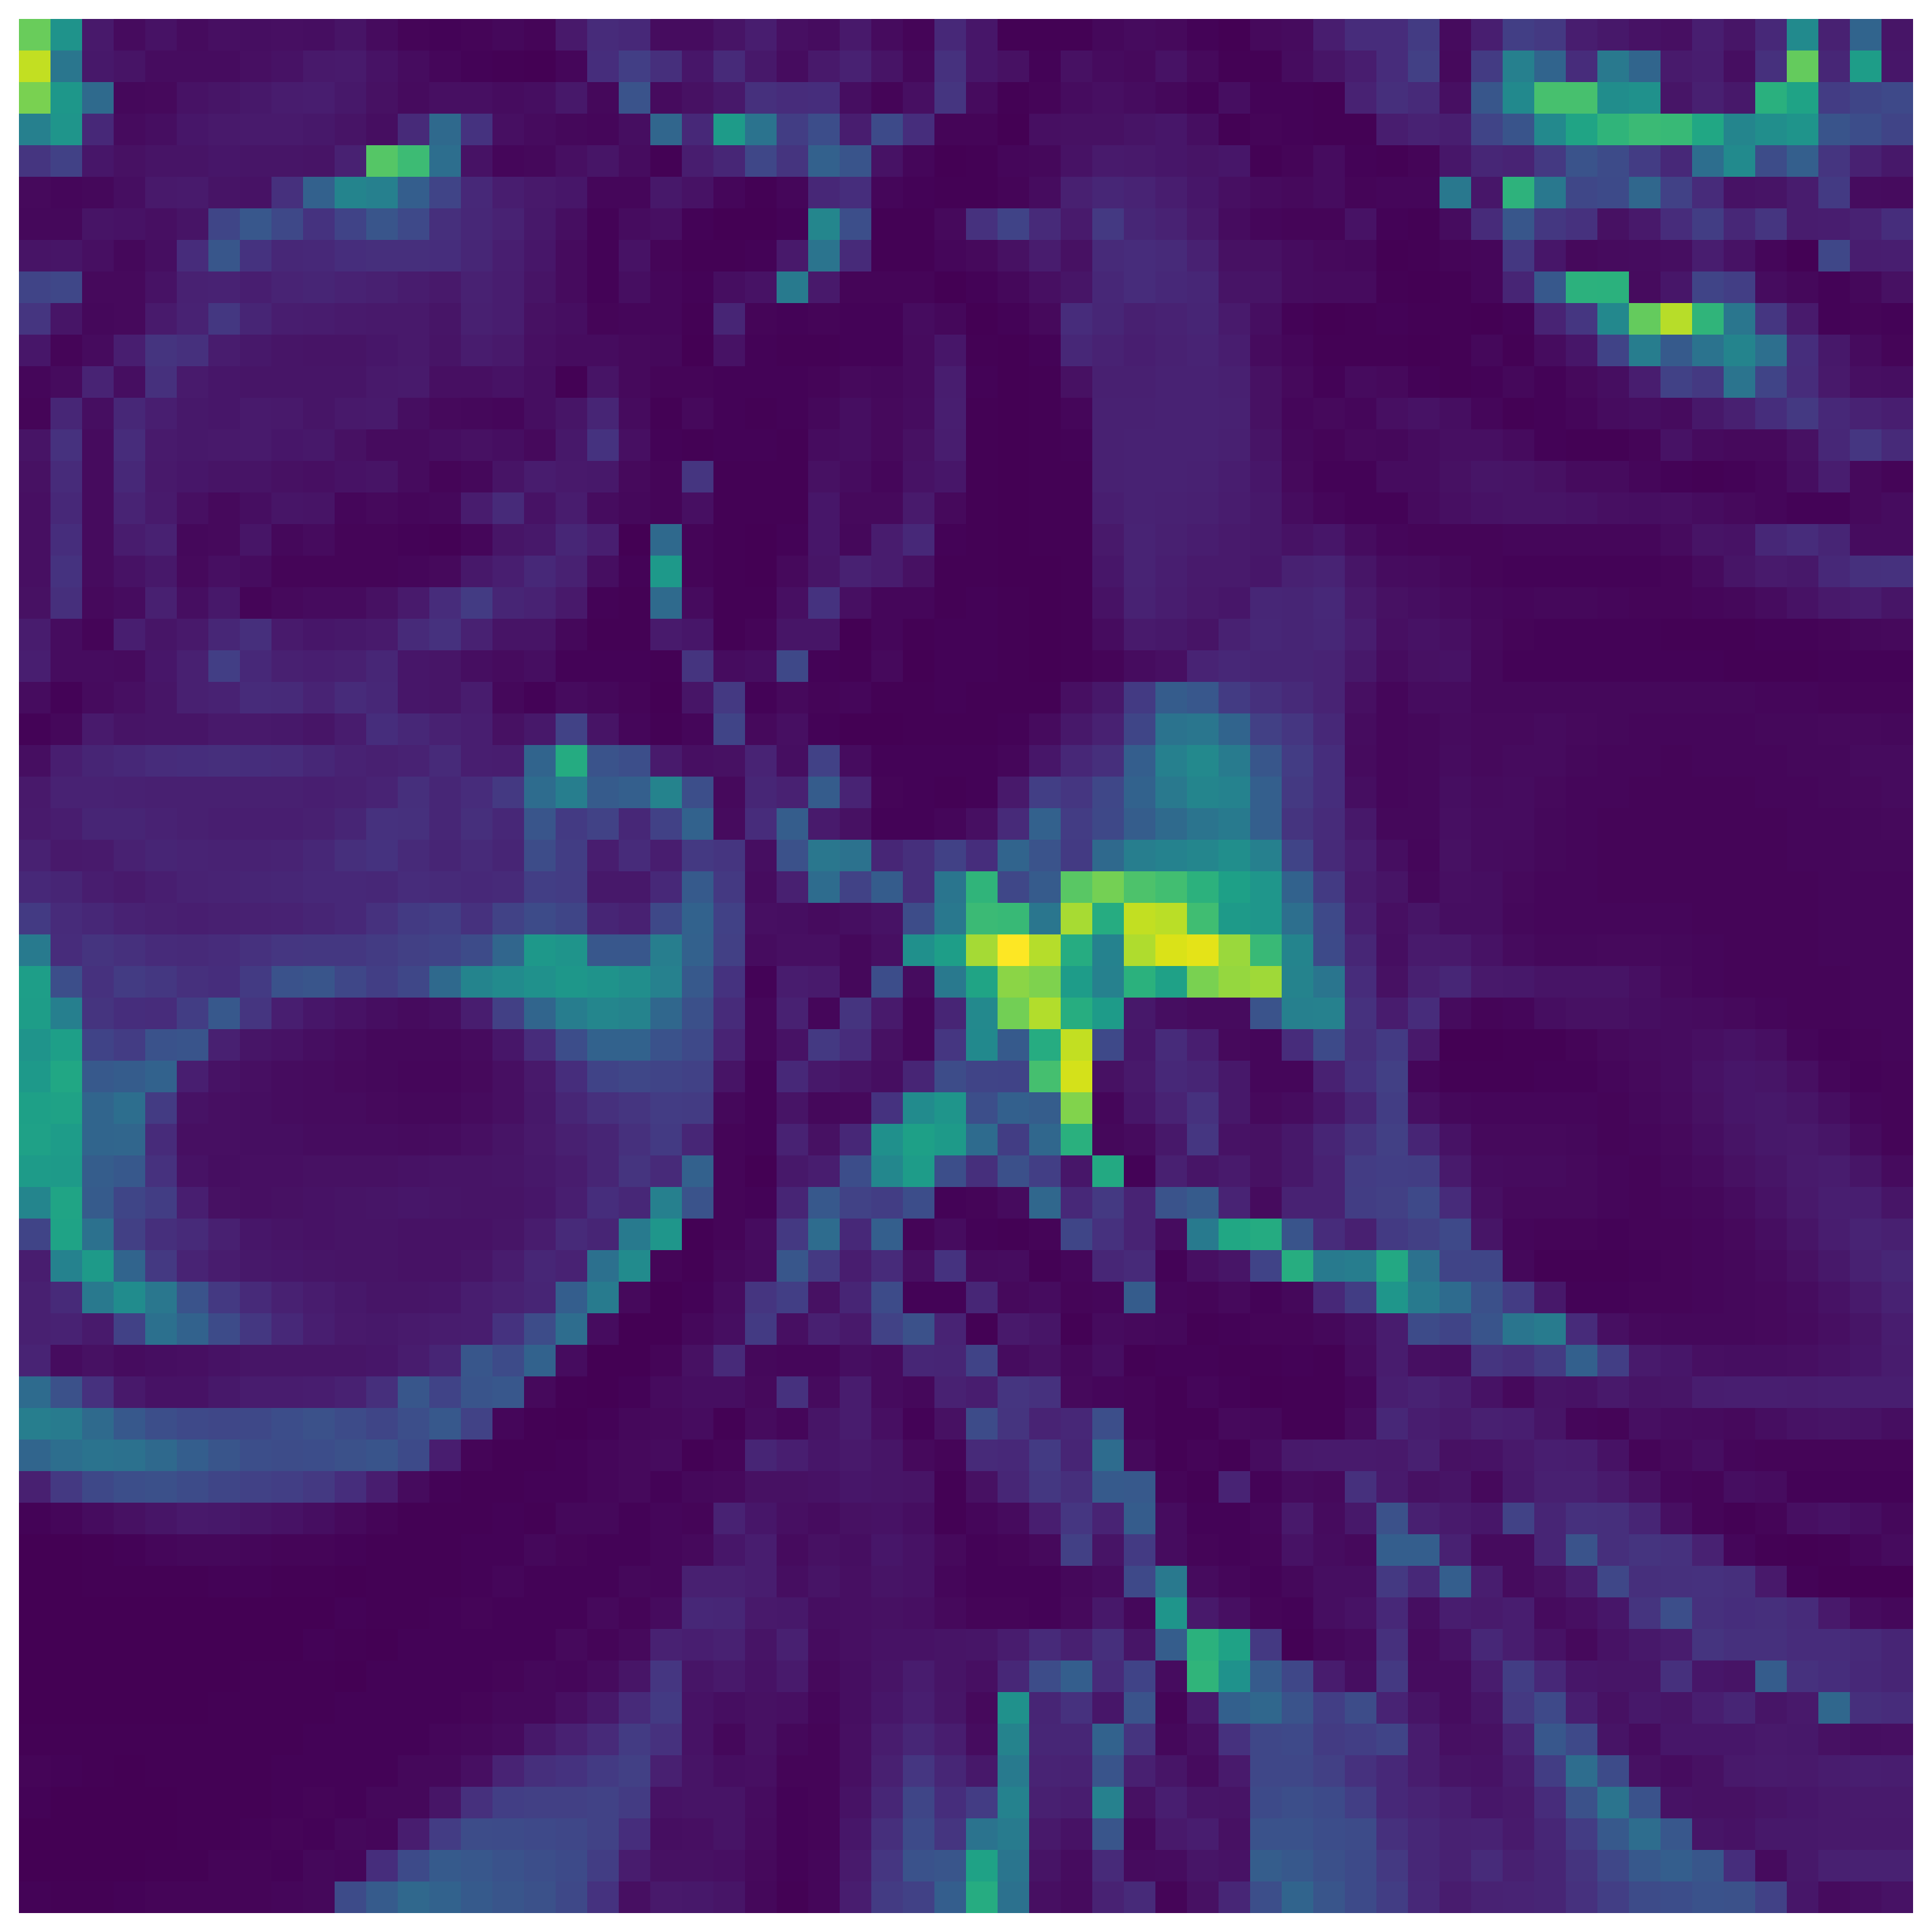

In [26]:
deep_nn.visualize(grid_size=60)